In [20]:
# FactoryGuard AI
# Exploratory Data Analysis (EDA ONLY)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#1.load the dataset and data manipulation
df = pd.read_csv("factoryguard_synthetic_500.csv")

# Convert 'timestamp' to datetime objects for proper plotting
df['timestamp'] = pd.to_datetime(df['timestamp'])

print("Dataset Shape:", df.shape)


Dataset Shape: (360000, 14)


In [21]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360000 entries, 0 to 359999
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   arm_id                 360000 non-null  object        
 1   timestamp              360000 non-null  datetime64[ns]
 2   temperature_c          360000 non-null  float64       
 3   vibration_rms_mm_s     360000 non-null  float64       
 4   pressure_bar           360000 non-null  float64       
 5   torque_nm              360000 non-null  float64       
 6   motor_current_a        360000 non-null  float64       
 7   rpm                    360000 non-null  float64       
 8   humidity_pct           360000 non-null  float64       
 9   age_hours              360000 non-null  int64         
 10  maintenance_days_ago   360000 non-null  int64         
 11  error_count            360000 non-null  int64         
 12  load_pct               360000

In [22]:
print("\nDataset Summary:")
print(df.describe())


Dataset Summary:
       temperature_c  vibration_rms_mm_s   pressure_bar      torque_nm  \
count  360000.000000       360000.000000  360000.000000  360000.000000   
mean       45.240547            0.525125       5.027494      20.222186   
std         3.282676            0.205293       0.480089       2.219905   
min        33.629000            0.184900       3.442100      10.540000   
25%        43.042000            0.434675       4.710100      18.763000   
50%        45.298000            0.506100       5.031600      20.225000   
75%        47.378000            0.575500       5.373800      21.642000   
max        63.886000            6.328400       7.244400      33.061000   

       motor_current_a            rpm   humidity_pct     age_hours  \
count    360000.000000  360000.000000  360000.000000  360000.00000   
mean         10.067012    1498.998082      39.706850   10718.75400   
std           1.278404      57.220693       8.066849    5697.66111   
min           6.058000    1110.6900

In [23]:
# 2. BASIC DATA OVERVIEW

print("\nFirst 5 Rows:")
print(df.head())

print("\nColumn Names:")
print(df.columns)


First 5 Rows:
     arm_id           timestamp  temperature_c  vibration_rms_mm_s  \
0  arm_0000 2025-12-21 13:00:00         49.443              0.4598   
1  arm_0000 2025-12-21 14:00:00         49.578              0.4612   
2  arm_0000 2025-12-21 15:00:00         50.274              0.4475   
3  arm_0000 2025-12-21 16:00:00         50.146              0.4606   
4  arm_0000 2025-12-21 17:00:00         50.336              0.4647   

   pressure_bar  torque_nm  motor_current_a      rpm  humidity_pct  age_hours  \
0        4.7773     18.920            9.901  1541.99         37.08       1617   
1        4.8058     20.861           10.186  1543.93         33.99       1616   
2        4.8498     20.378            9.813  1529.95         34.64       1615   
3        4.8124     19.654            9.752  1573.37         34.34       1614   
4        4.7909     21.411            9.312  1538.74         34.28       1613   

   maintenance_days_ago  error_count  load_pct  time_to_failure_hours  
0    

In [24]:
# 3. MISSING VALUE ANALYSIS

print("\nMissing Values:")
print(df.isna().sum())

# Target column were added
df["failure_in_next_24h"] = (df["time_to_failure_hours"].notna() &(df["time_to_failure_hours"] <= 24)).astype(int)
print(df["failure_in_next_24h"].value_counts())


Missing Values:
arm_id                        0
timestamp                     0
temperature_c                 0
vibration_rms_mm_s            0
pressure_bar                  0
torque_nm                     0
motor_current_a               0
rpm                           0
humidity_pct                  0
age_hours                     0
maintenance_days_ago          0
error_count                   0
load_pct                      0
time_to_failure_hours    322378
dtype: int64
0    358500
1      1500
Name: failure_in_next_24h, dtype: int64


In [25]:
print(df[df.duplicated()])
print(df.duplicated().sum())

Empty DataFrame
Columns: [arm_id, timestamp, temperature_c, vibration_rms_mm_s, pressure_bar, torque_nm, motor_current_a, rpm, humidity_pct, age_hours, maintenance_days_ago, error_count, load_pct, time_to_failure_hours, failure_in_next_24h]
Index: []
0



Failure Distribution (Count):
0    358500
1      1500
Name: failure_in_next_24h, dtype: int64

Failure Distribution (%):
0    99.583333
1     0.416667
Name: failure_in_next_24h, dtype: float64


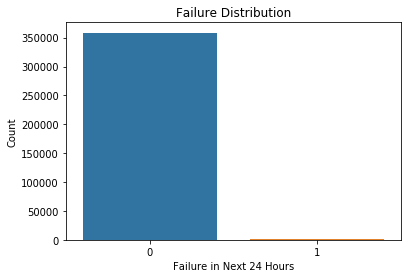

In [26]:
# 4. TARGET VARIABLE ANALYSIS

print("\nFailure Distribution (Count):")
print(df['failure_in_next_24h'].value_counts())

print("\nFailure Distribution (%):")
print(df['failure_in_next_24h'].value_counts(normalize=True) * 100)

sns.countplot(x='failure_in_next_24h', data=df)
plt.title("Failure Distribution")
plt.xlabel("Failure in Next 24 Hours")
plt.ylabel("Count")
plt.show()

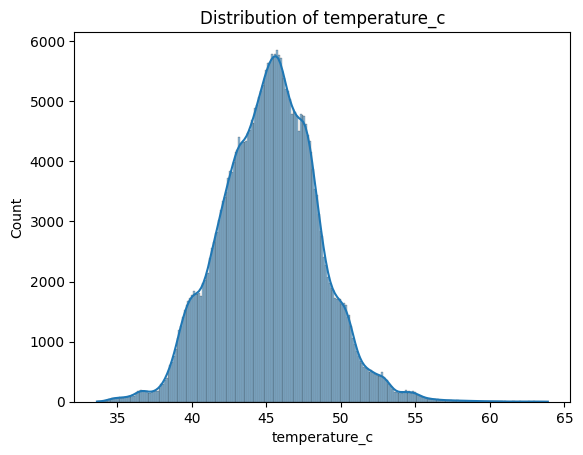

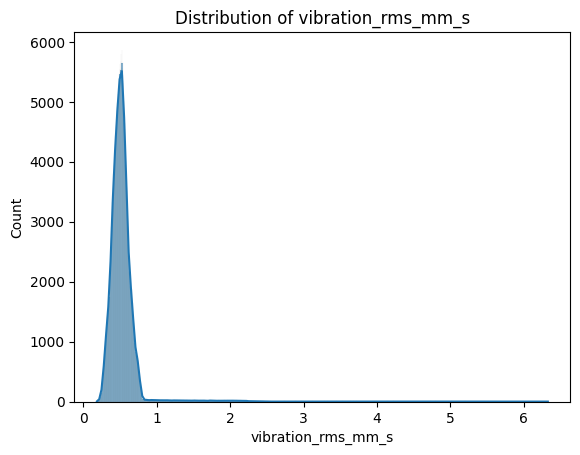

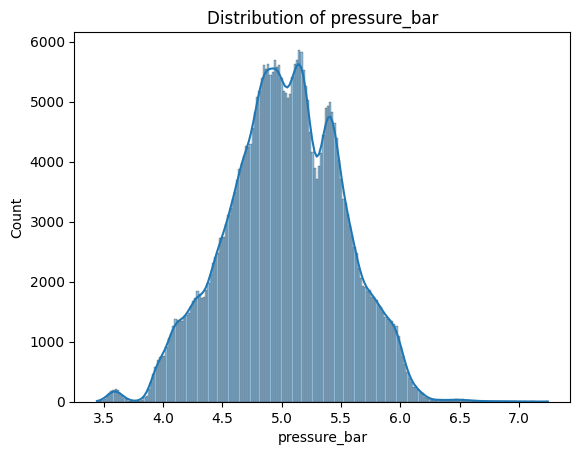

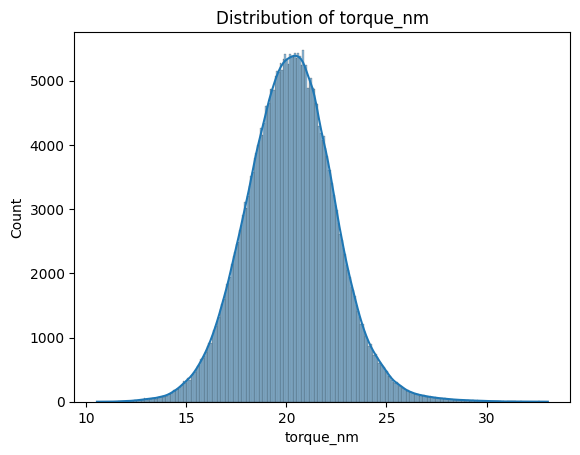

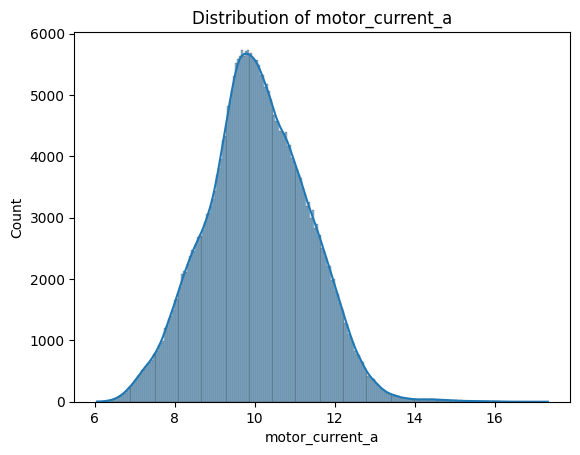

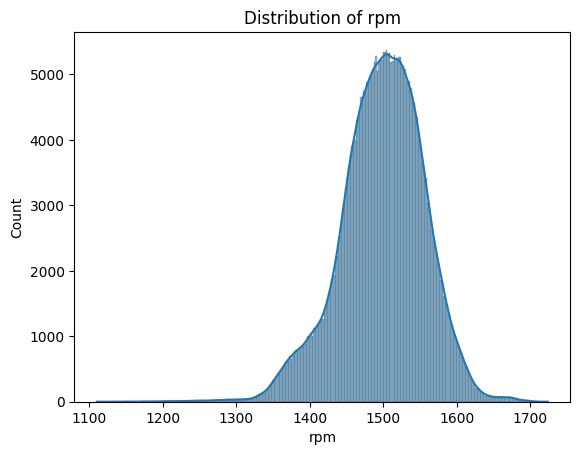

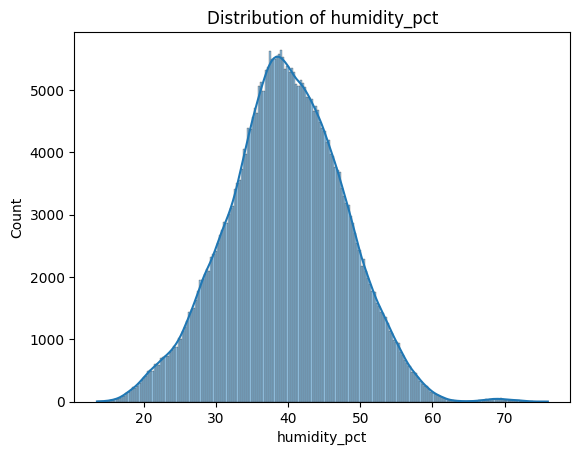

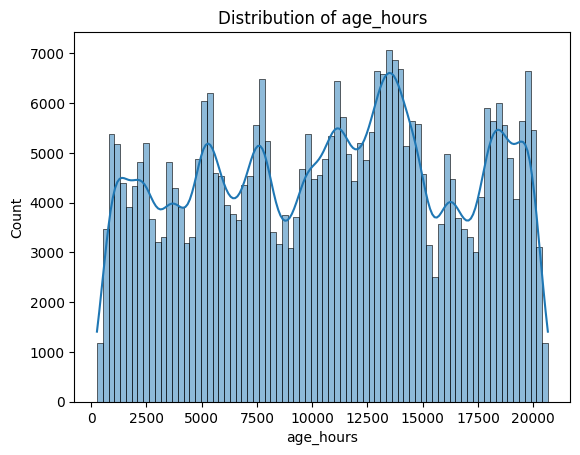

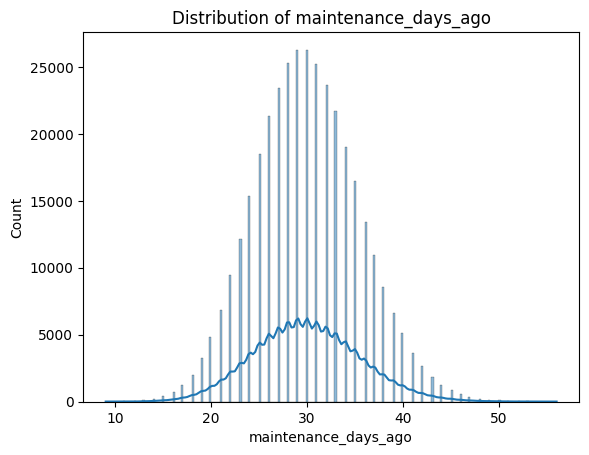

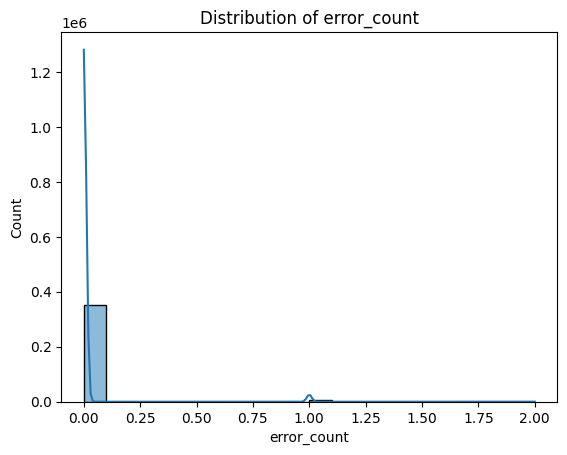

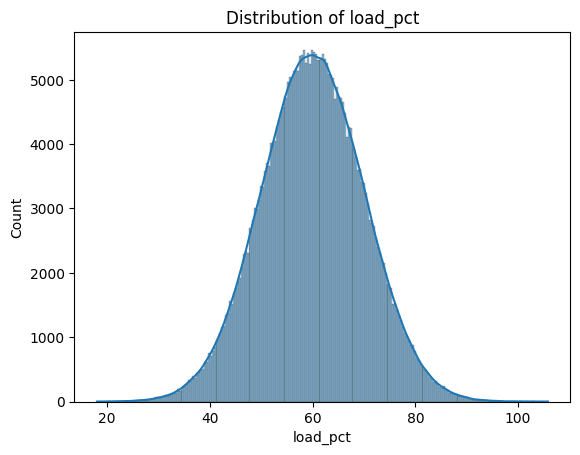

In [12]:
 # 5. UNIVARIATE ANALYSIS (KEY SENSORS)

feauture_col=['temperature_c', 'vibration_rms_mm_s',
       'pressure_bar', 'torque_nm', 'motor_current_a', 'rpm', 'humidity_pct',
       'age_hours', 'maintenance_days_ago', 'error_count', 'load_pct']

for col in feauture_col:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

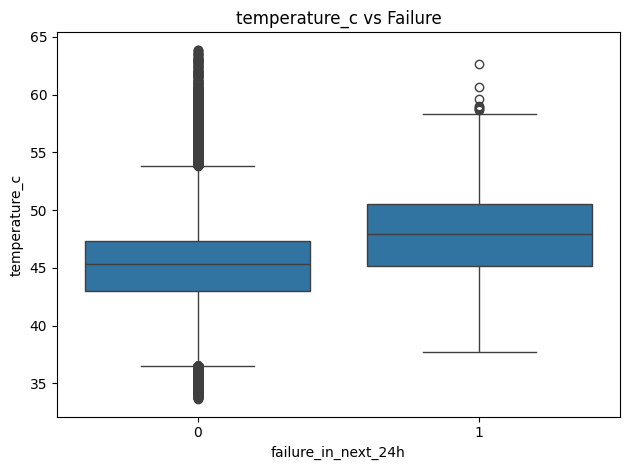

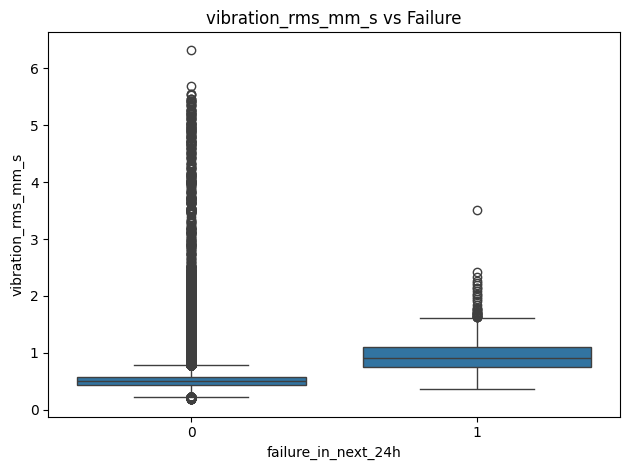

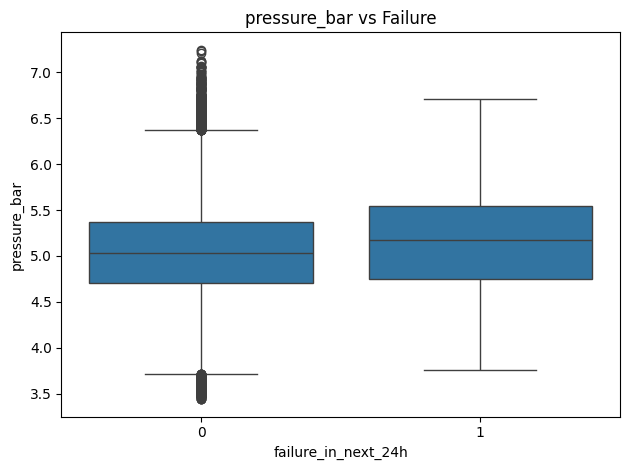

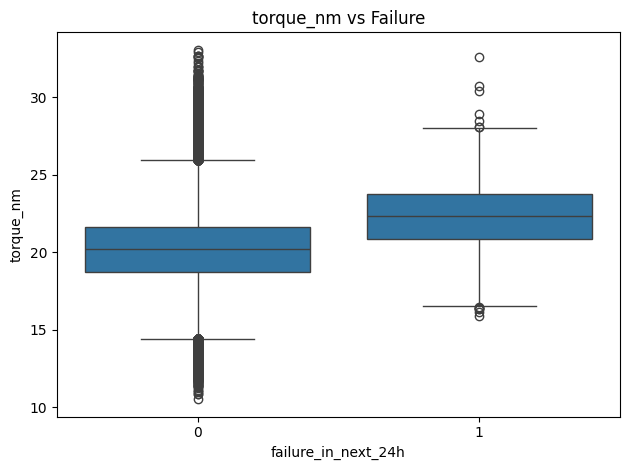

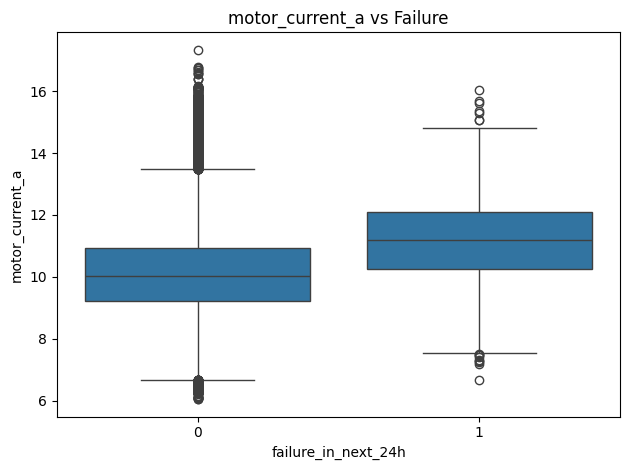

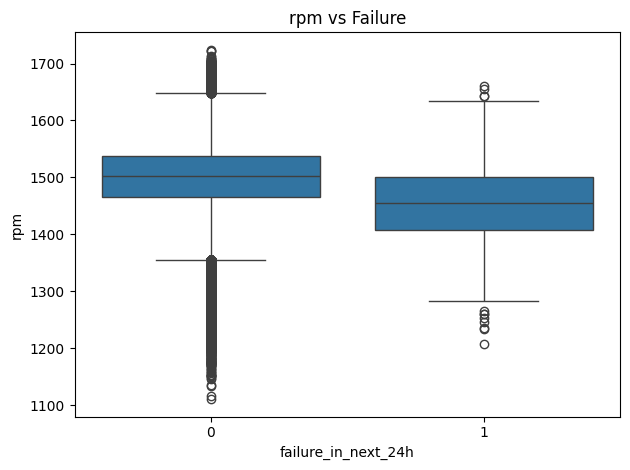

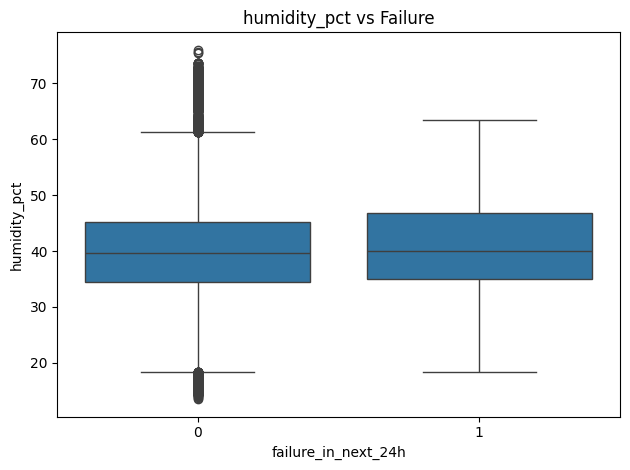

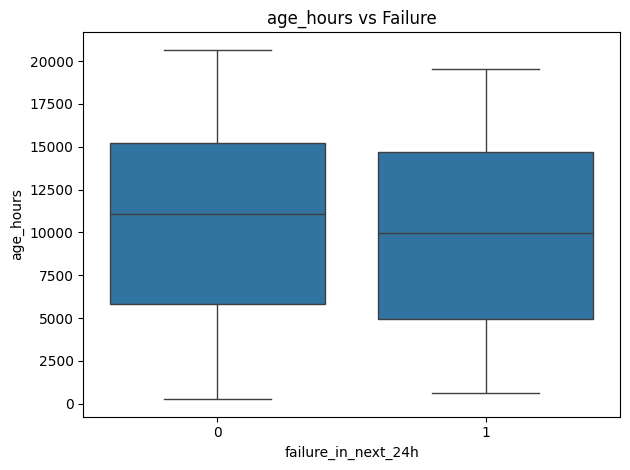

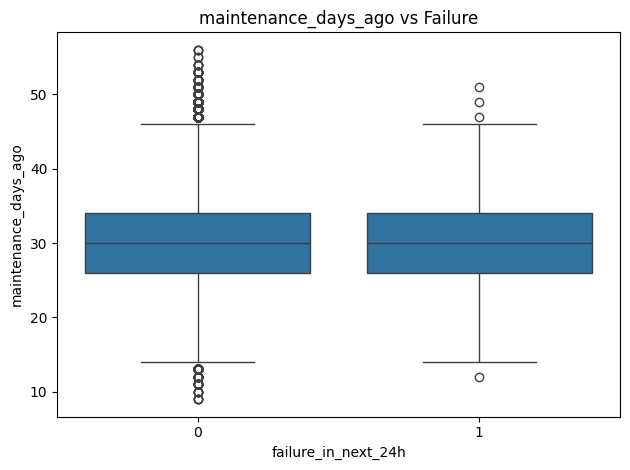

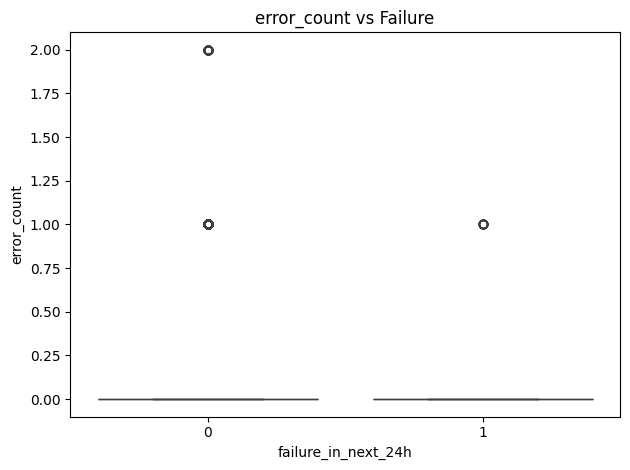

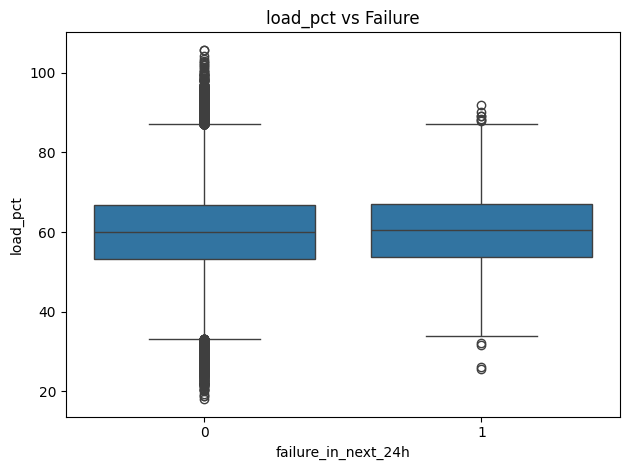

In [13]:
# 6. FAILURE vs SENSOR ANALYSIS
feauture_col=['temperature_c', 'vibration_rms_mm_s',
       'pressure_bar', 'torque_nm', 'motor_current_a', 'rpm', 'humidity_pct',
       'age_hours', 'maintenance_days_ago', 'error_count', 'load_pct']

for col in feauture_col:
    sns.boxplot(x='failure_in_next_24h', y=col, data=df)
    plt.title(f"{col} vs Failure")
    plt.tight_layout()
    plt.show()

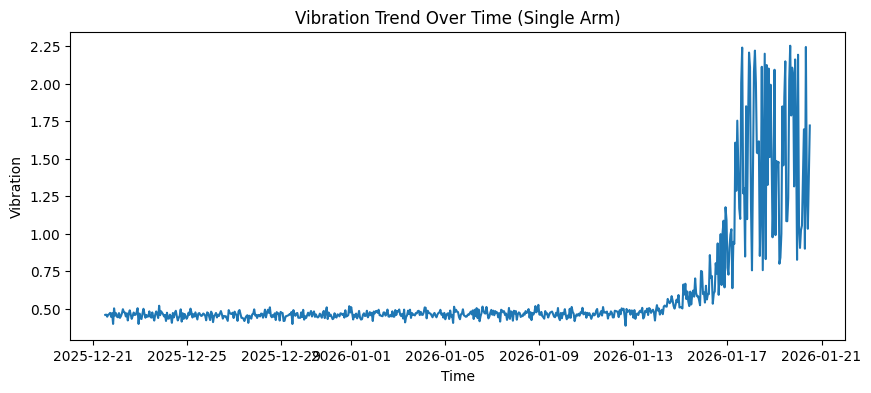

In [14]:
# 7. TIME-SERIES ANALYSIS (ONE ARM EXAMPLE)
example_arm = df['arm_id'].iloc[0]
arm_df = df[df['arm_id'] == example_arm]

plt.figure(figsize=(10,4))
plt.plot(arm_df['timestamp'], arm_df['vibration_rms_mm_s'])
plt.title("Vibration Trend Over Time (Single Arm)")
plt.xlabel("Time")
plt.ylabel("Vibration")
plt.show()

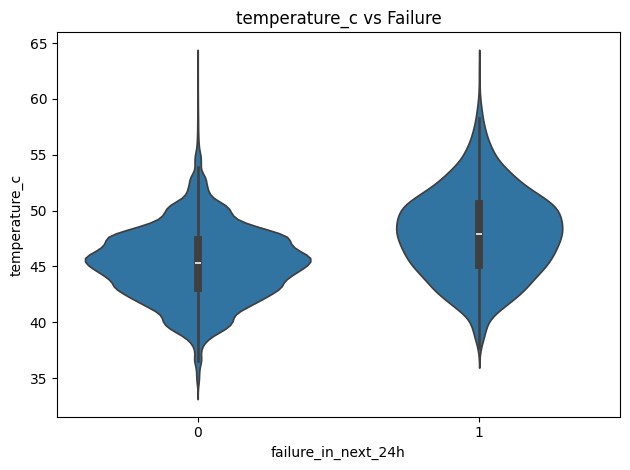

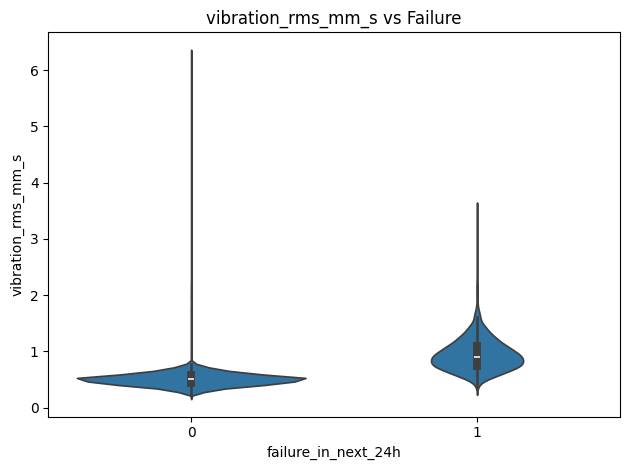

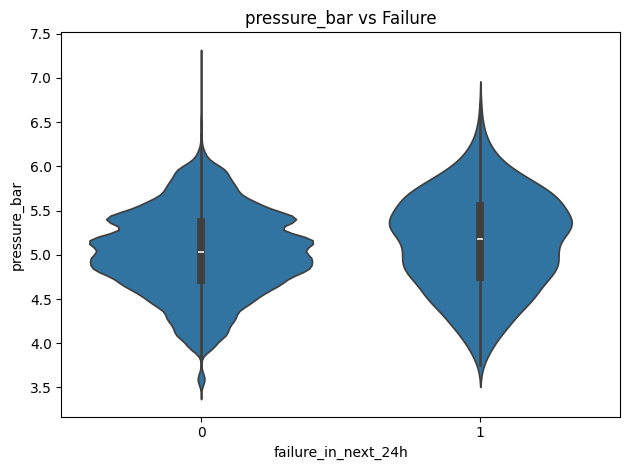

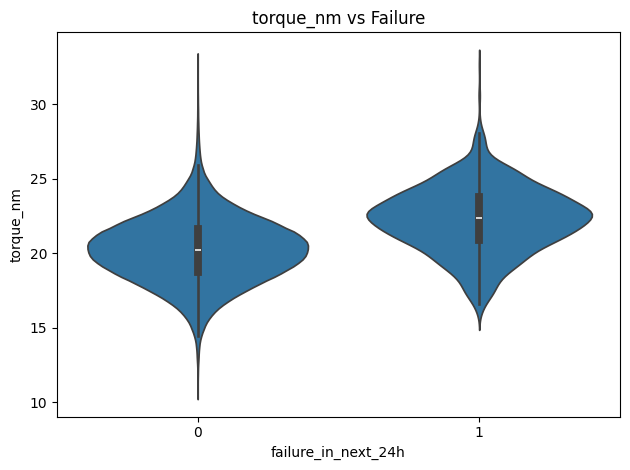

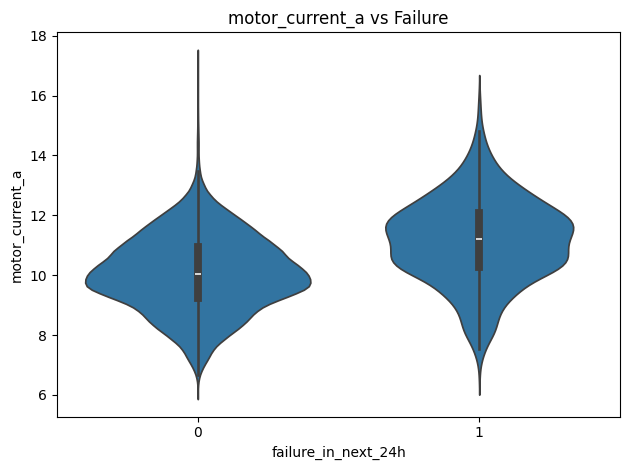

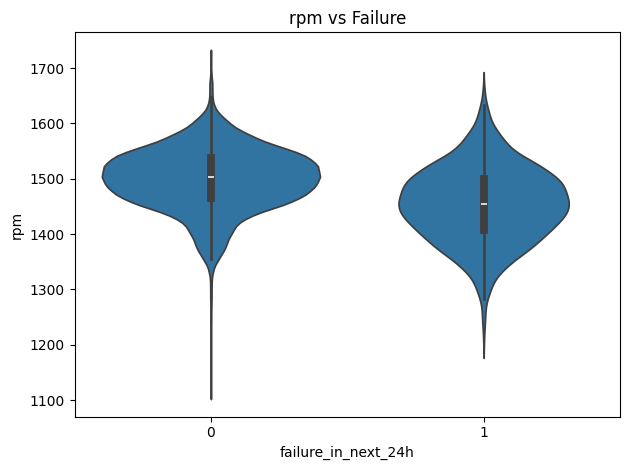

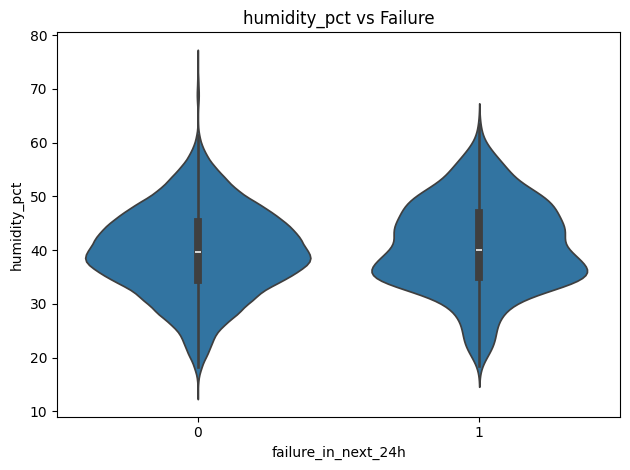

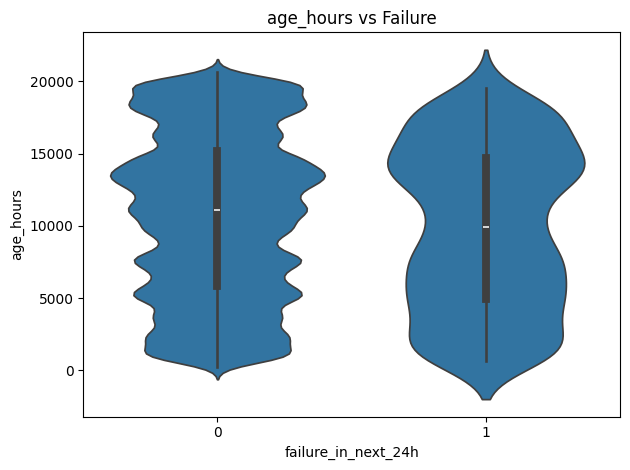

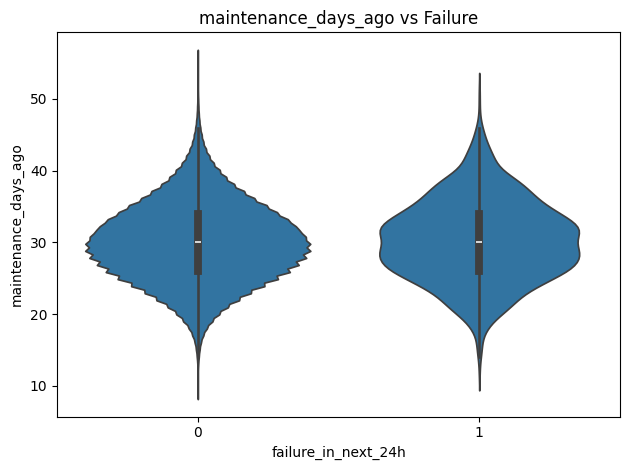

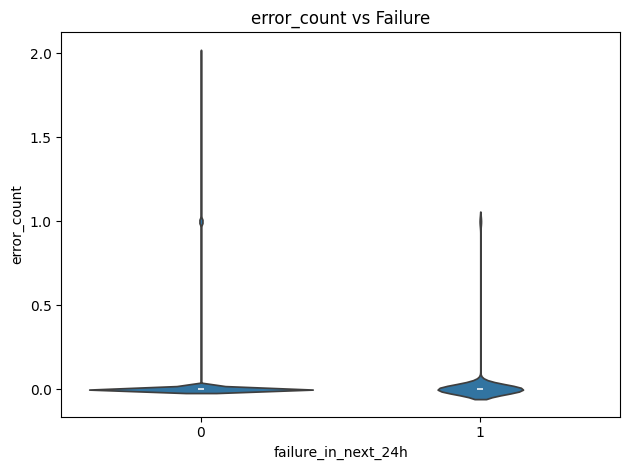

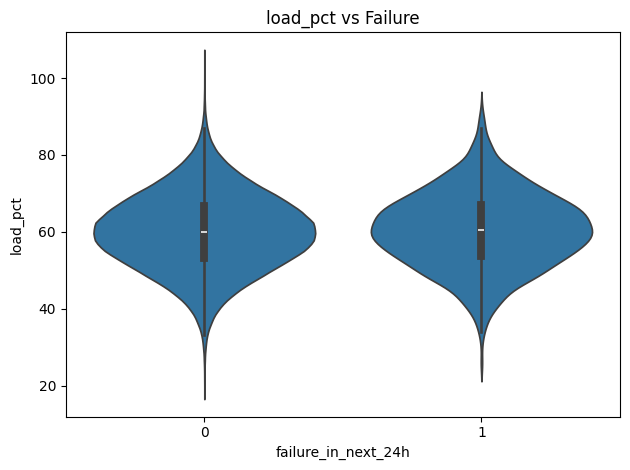

In [15]:
# 8. violin plot analysis
feauture_col=['temperature_c', 'vibration_rms_mm_s',
       'pressure_bar', 'torque_nm', 'motor_current_a', 'rpm', 'humidity_pct',
       'age_hours', 'maintenance_days_ago', 'error_count', 'load_pct']

for col in feauture_col:
    sns.violinplot(x='failure_in_next_24h', y=col, data=df)
    plt.title(f"{col} vs Failure")
    plt.tight_layout()
    plt.show()





Correlation with Failure:
failure_in_next_24h      1.000000
vibration_rms_mm_s       0.133123
torque_nm                0.059411
motor_current_a          0.054806
temperature_c            0.053175
pressure_bar             0.014934
humidity_pct             0.008087
maintenance_days_ago     0.003305
load_pct                 0.002638
error_count             -0.001918
age_hours               -0.009633
rpm                     -0.050930
time_to_failure_hours   -0.334362
Name: failure_in_next_24h, dtype: float64


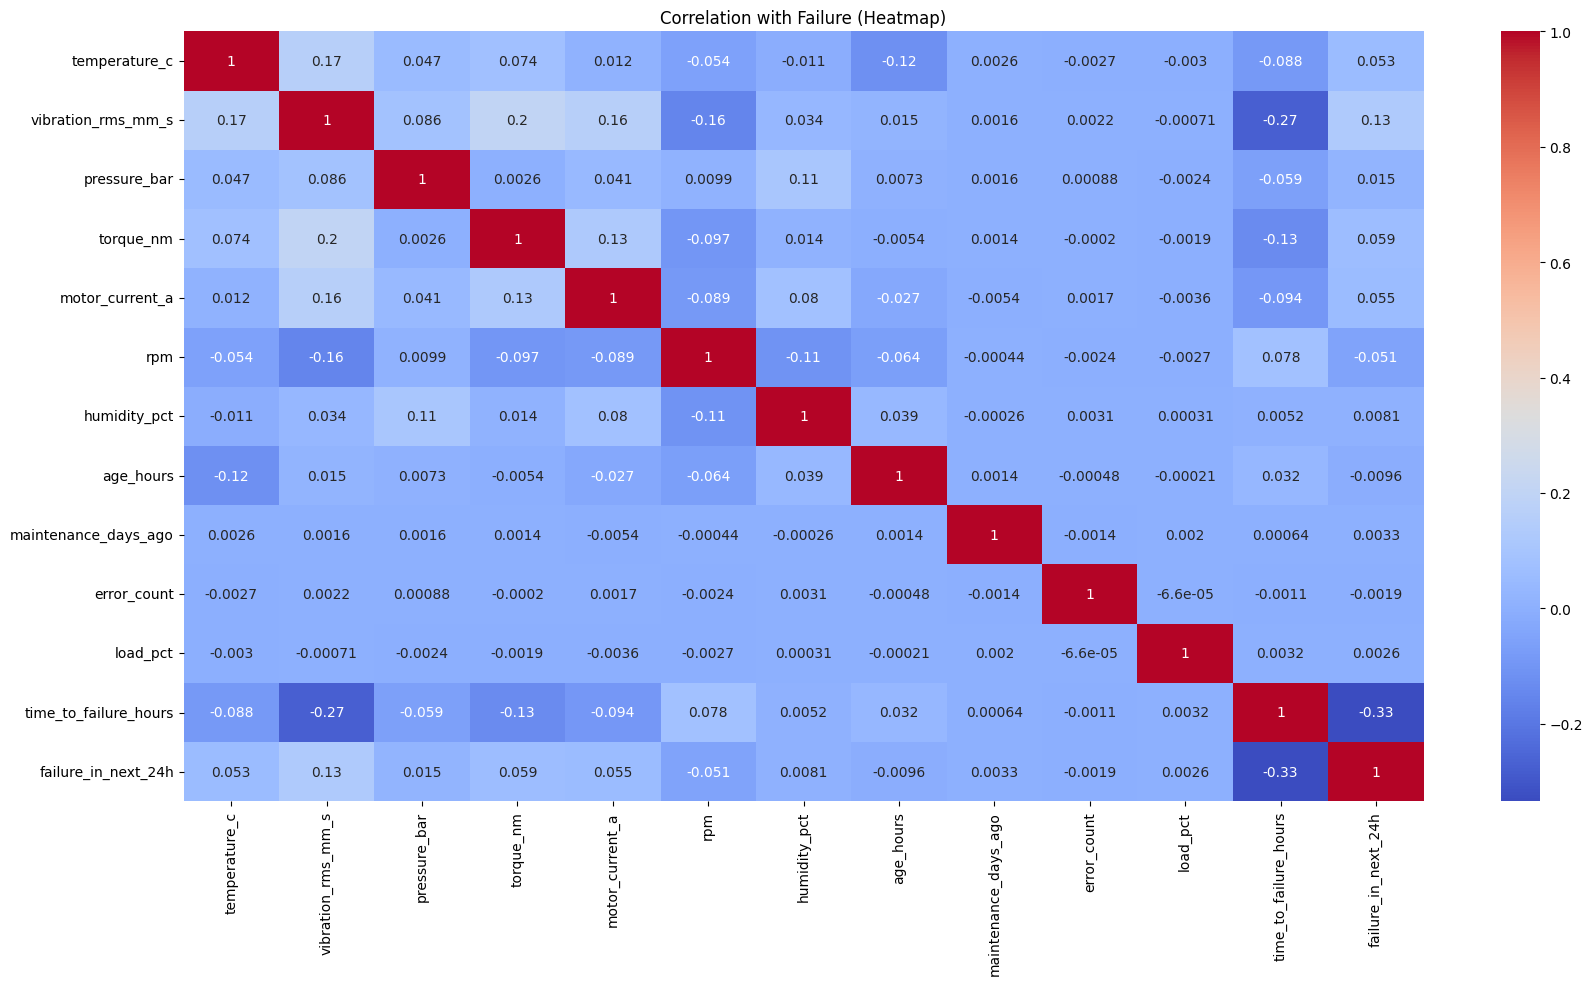

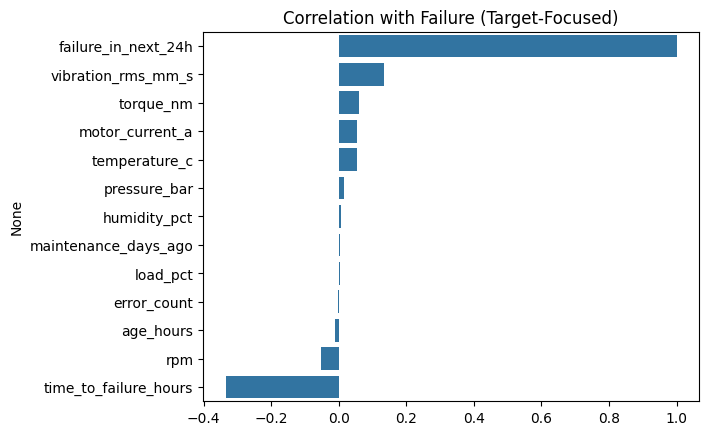

In [18]:
# 9. CORRELATION WITH TARGET
corr_target = df.corr(numeric_only=True)['failure_in_next_24h'].sort_values(ascending=False)

print("\nCorrelation with Failure:")
print(corr_target)

plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation with Failure (Heatmap)")
plt.show()

sns.barplot(x=corr_target.values,y=corr_target.index)
plt.title("Correlation with Failure (Target-Focused)")
plt.show()

Generating visualizations for the DataFrame...


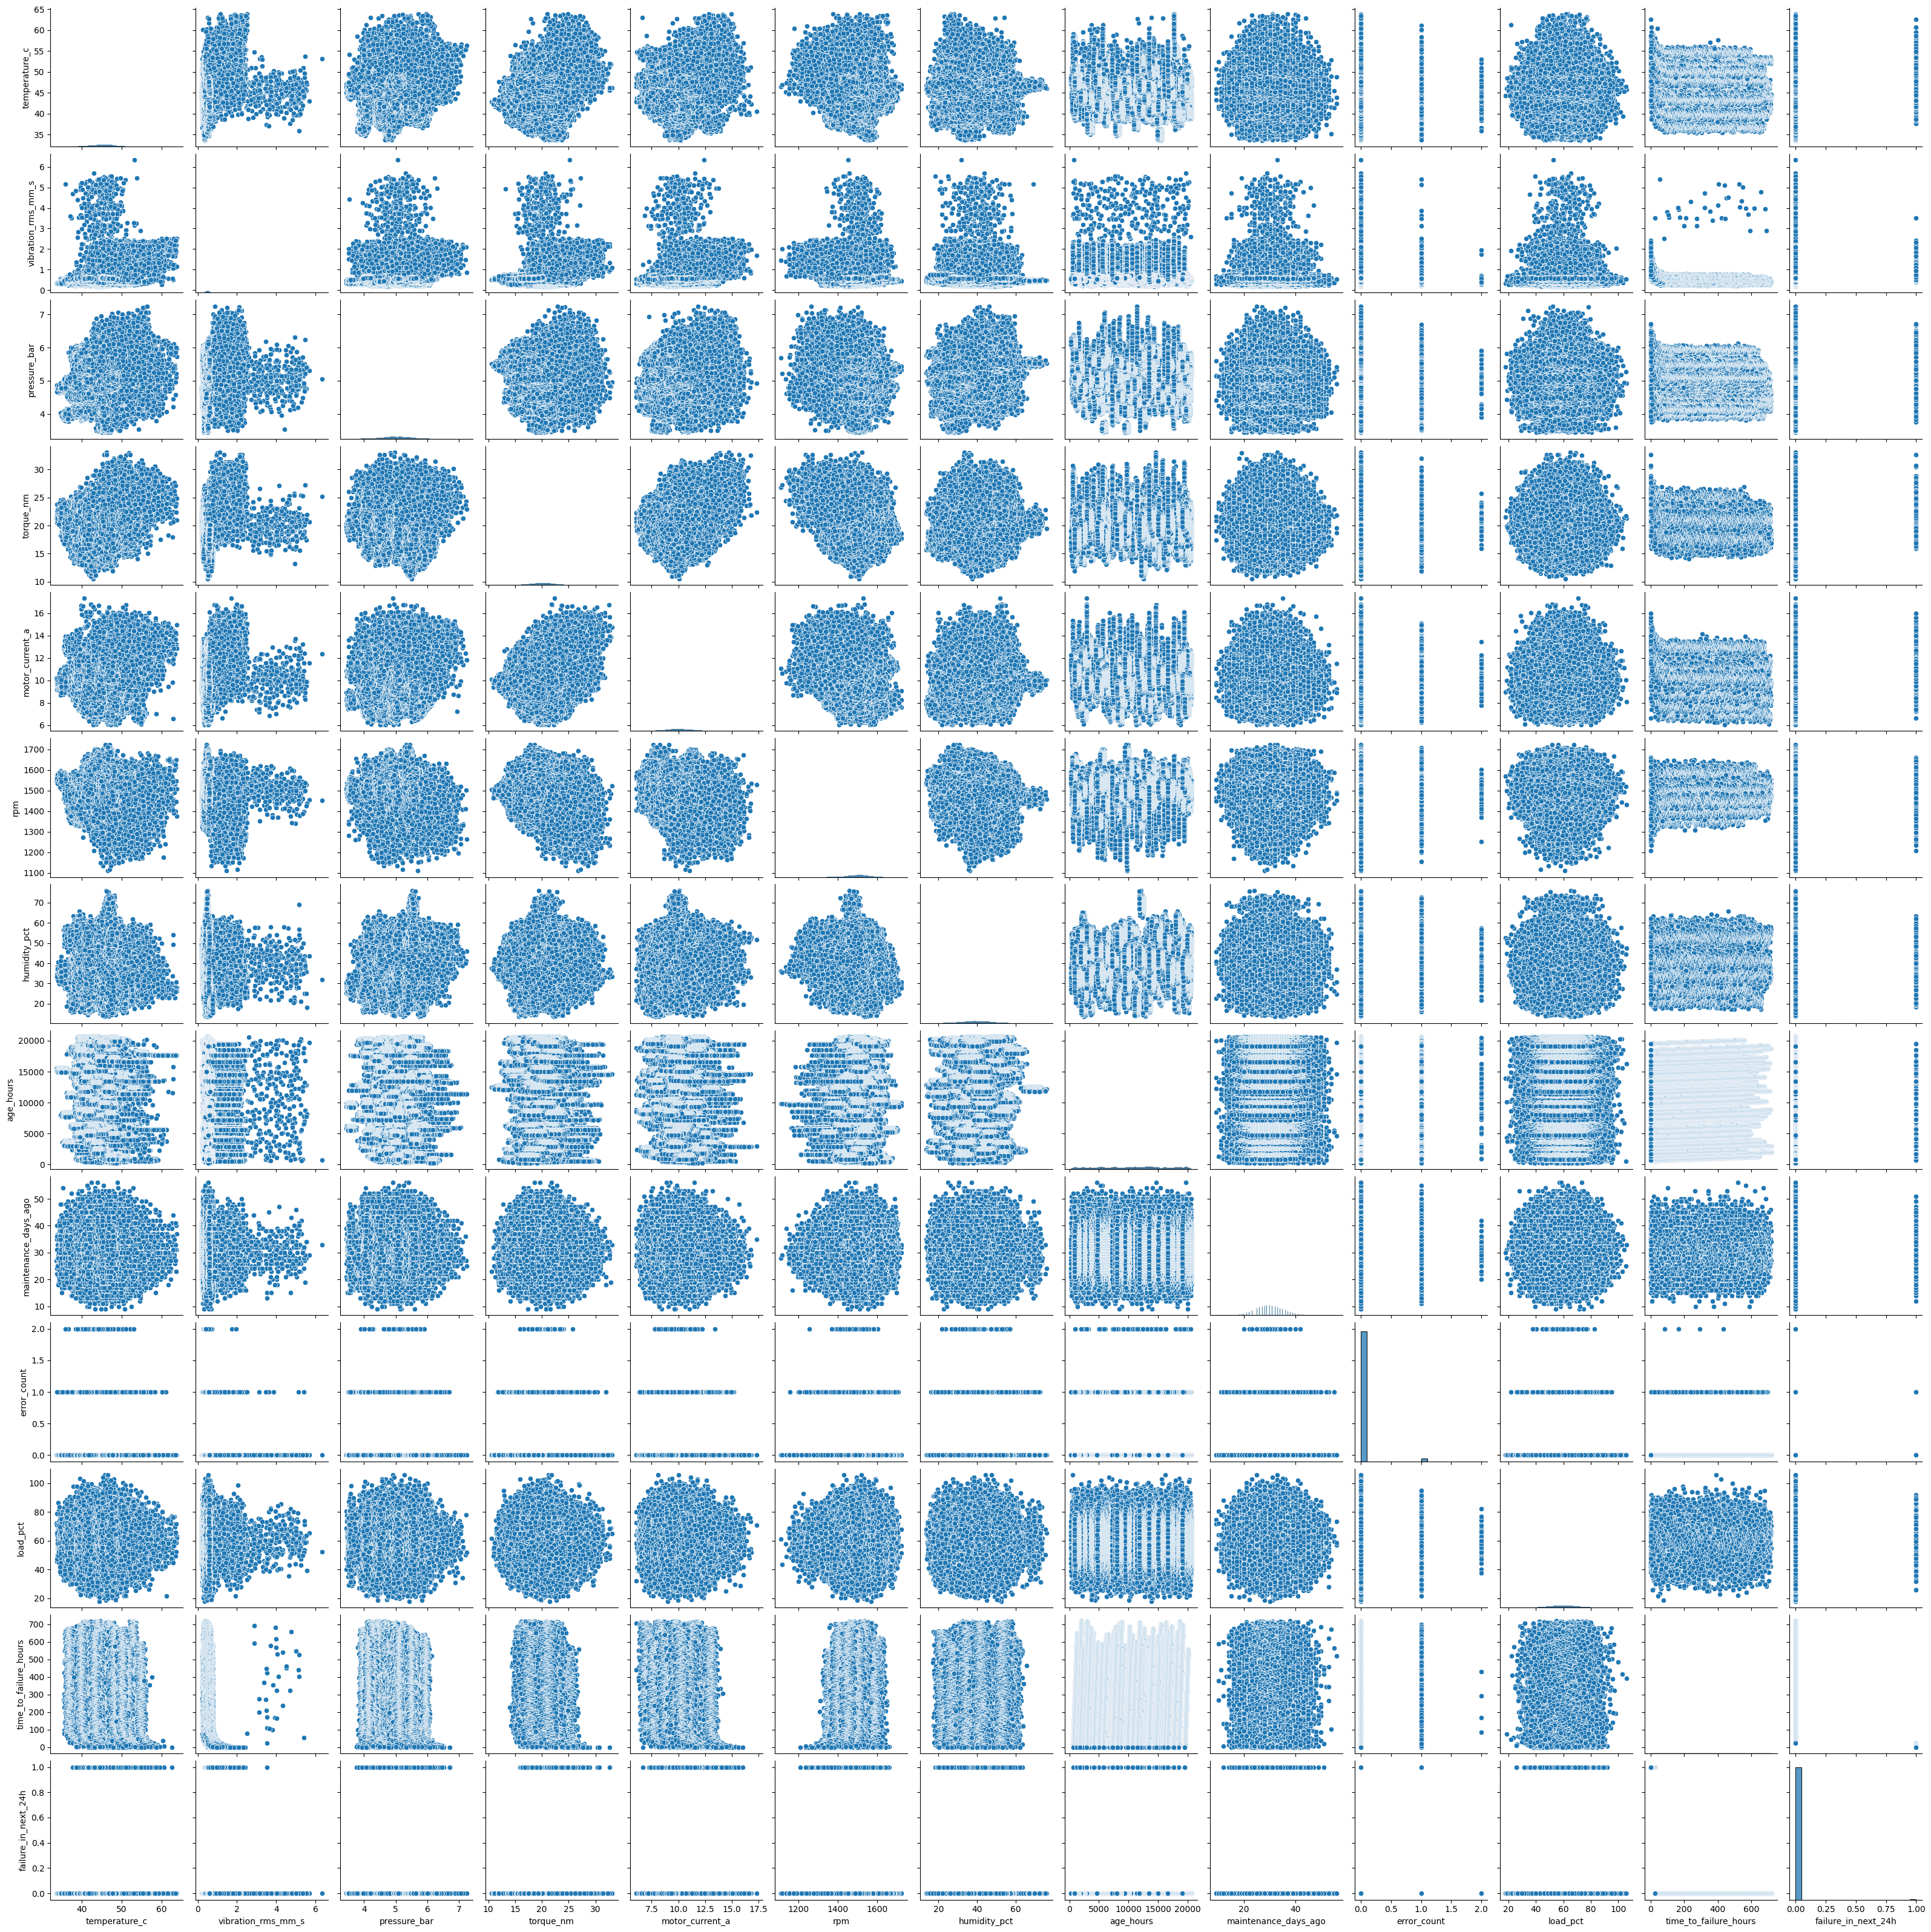

In [19]:
print("Generating visualizations for the DataFrame...")

sns.pairplot(df) # Commented out due to potentially long execution time for large datasets
plt.show()

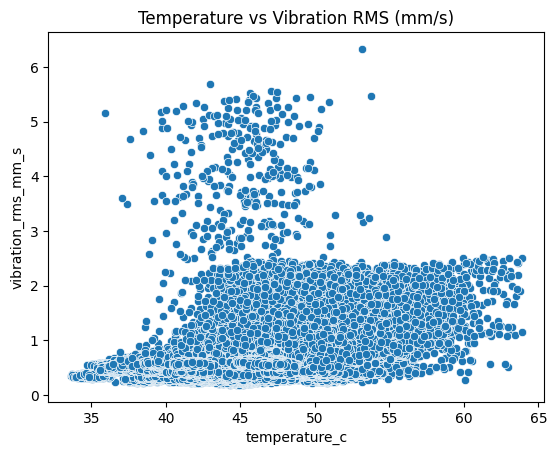

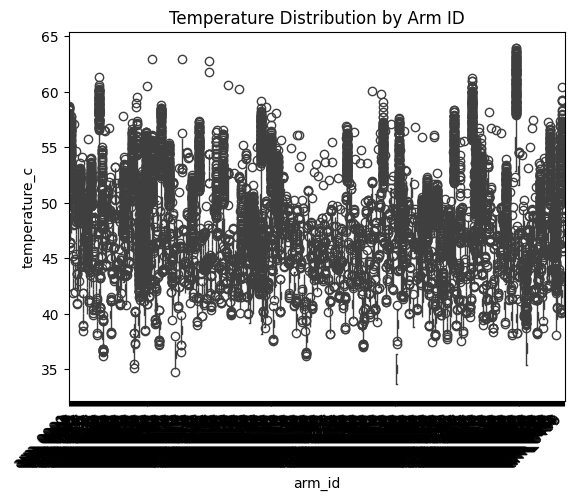

In [20]:
sns.scatterplot(data=df, x='temperature_c', y='vibration_rms_mm_s')
plt.title('Temperature vs Vibration RMS (mm/s)')
plt.show()

sns.boxplot(data=df, x='arm_id', y='temperature_c')
plt.title('Temperature Distribution by Arm ID')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.show()


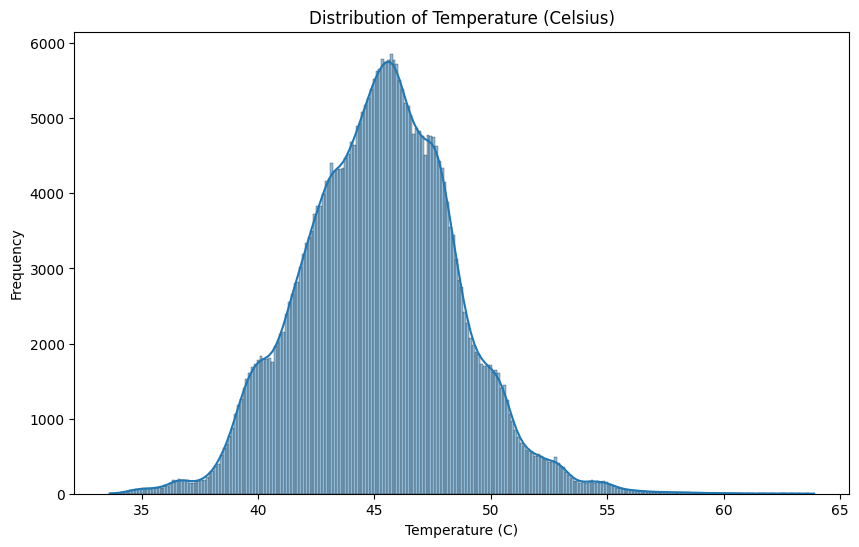

In [21]:
# Histogram for 'temperature_c'
plt.figure(figsize=(10, 6))
sns.histplot(df['temperature_c'], kde=True)
plt.title('Distribution of Temperature (Celsius)')
plt.xlabel('Temperature (C)')
plt.ylabel('Frequency')
plt.show()

In [22]:
# 10. EDA SUMMARY
print("""EDA SUMMARY:
    1. Failures are rare, indicating strong class imbalance.
    2. Vibration and temperature increase before failure.
    3. Maintenance gap and error count strongly affect failure risk.
    4. Time-based trends exist, justifying temporal feature engineering.
    5. Outliers in vibration are meaningful early-warning signals.
    """)

EDA SUMMARY:
    1. Failures are rare, indicating strong class imbalance.
    2. Vibration and temperature increase before failure.
    3. Maintenance gap and error count strongly affect failure risk.
    4. Time-based trends exist, justifying temporal feature engineering.
    5. Outliers in vibration are meaningful early-warning signals.
    
